<a href="https://colab.research.google.com/github/Zee3615/test/blob/master/food_recommender_draft5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data set:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from scipy.stats.mstats import winsorize
from statistics import mode
import scipy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd
df=pd.read_csv('gdrive/My Drive/food_recommend/data_file/menu.csv')

**DATA EXPLORATION**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [6]:
df.head(2)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8


In [7]:
df.loc[df['Category']=='Beverages'].head()
#df.loc[df['Category']=='Coffee & Tea'].head()
#df.loc[df['Category']=='Smoothies & Shakes'].head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,0,0,0,0,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,0,0,5,0,55,18,0,0,55,0,0,0,0,0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,0,0,5,0,76,25,0,0,76,0,0,0,0,0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,0,0,0,0,28,9,0,0,28,0,0,0,0,0
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,0,0,10,0,0,0,0,0,0,0,0,0,0,0


**Clean Up Serving Size**

In [8]:
import re

non_bev = ['Breakfast','Chicken & Fish','Beef & Pork','Snacks & Sides','Desserts','Salads']
bev = ['Coffee & Tea','Smoothies & Shakes','Beverages']

#df.loc[df['Category']=='Smoothies & Shakes'].head()

df['Serving_Size_(g)'] = " "
df['Serving_Size_(oz)'] = df['Serving Size']

for item in non_bev:
  df.loc[df['Category'] == item]
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"\(.*\)"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"oz"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"cookie"," ")


for item in bev:
  df.loc[df['Category'] == item]
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"fl cup"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"carton"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"fl"," ")
  df['Serving_Size_(oz)'] = df['Serving_Size_(oz)'].str.replace(r"cup"," ")

#rename Serving Size
#df = df.rename(columns={"Serving Size": "Serving Size (oz)"})
df
#df['Serving Size'] = df['Serving Size'].replace(regex=True,inplace=True,to_replace=r"oz",value=r'')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving_Size_(g),Serving_Size_(oz)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,,4.8
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,,4.8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,,3.9
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15,,5.7
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10,,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8,,10.1
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10,,13.4
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6,,6.7
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6,,14.2


**CONVERT TO FLOAT , REARRANGE COLUMNS**

In [9]:
#Convert series to float 
#cols = df.columns[df.dtypes.eq(object)]

df['Serving_Size_(oz)'] = pd.to_numeric(df['Serving_Size_(oz)'], errors='coerce')

#df['Serving Size'] = df['Serving Size'].apply(lambda x: float(x))

#Create gram column 

df ['Serving_Size_(g)'] = df['Serving_Size_(oz)']*28.3495
df['Serving Size'] = df['Serving Size']

df = df[['Category', 'Item', 'Serving Size','Serving_Size_(oz)', 'Serving_Size_(g)' ,'Calories',
       'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)',
       'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
       'Sodium (% Daily Value)', 'Carbohydrates',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)']]

In [10]:
df.head(2)

,Category,Item,Serving Size,Serving_Size_(oz),Serving_Size_(g),Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),4.8,136.0776,300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),4.8,136.0776,250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8


**Rename Saturated Fat to make processing easier**

In [11]:
#rename Serving Size
df = df.rename(columns={"Saturated Fat": "Saturated_Fat"})

**EXPLORE CATEGORIES**

In [12]:
df.loc[df['Category']=='Salads'].head(2)

,Category,Item,Serving Size,Serving_Size_(oz),Serving_Size_(g),Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated_Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
84,Salads,Premium Bacon Ranch Salad (without Chicken),7.9 oz (223 g),7.9,223.96105,140,70,7.0,11,3.5,18,0.0,25,9,300,13,10,3,3,12,4,9,170,30,15,6
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,9 oz (255 g),9.0,255.14550,380,190,21.0,33,6.0,29,0.0,70,23,860,36,22,7,2,10,5,25,100,25,15,8


In [13]:
item_test =  'Premium Bacon Ranch Salad (without Chicken)'

item_cal_test = df.loc[df['Item'] == item_test, 'Calories'].iloc[0]
item_cal_test

140

In [14]:
cat = df['Category'].unique()
cnt =  len(cat)
items = df['Category'].value_counts()

print ("There are {} categries of meals in the dataset.".format(cnt))
print (" ")
print ("These are: \n {}".format(cat))
print (" ")
print ("The counts for each category are as follows : \n {}".format(items))

There are 9 categries of meals in the dataset.
 
These are: 
 ['Breakfast' 'Beef & Pork' 'Chicken & Fish' 'Salads' 'Snacks & Sides'
 'Desserts' 'Beverages' 'Coffee & Tea' 'Smoothies & Shakes']
 
The counts for each category are as follows : 
 Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64


**Rename some columns to make easier to process later**

In [15]:
df['Category'] = df['Category'].replace(['Beef & Pork', 'Coffee & Tea','Smoothies & Shakes', 'Chicken & Fish', 'Snacks & Sides'],
                                        ['Beef_and_Pork', 'Coffee_and_Tea','Smoothies_and_Shakes', 'Chicken_and_Fish', 'Snacks_and_Sides'])

items = df['Category'].value_counts()
items

Coffee_and_Tea          95
Breakfast               42
Smoothies_and_Shakes    28
Beverages               27
Chicken_and_Fish        27
Beef_and_Pork           15
Snacks_and_Sides        13
Desserts                 7
Salads                   6
Name: Category, dtype: int64

**Further Data Exploration**

In [16]:
df.describe()

,Serving_Size_(oz),Serving_Size_(g),Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated_Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,12.803077,362.960829,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,7.054481,199.991014,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,1.000000,28.349500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.775000,192.067862,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,12.000000,340.194000,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,16.000000,453.592000,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,32.000000,907.184000,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


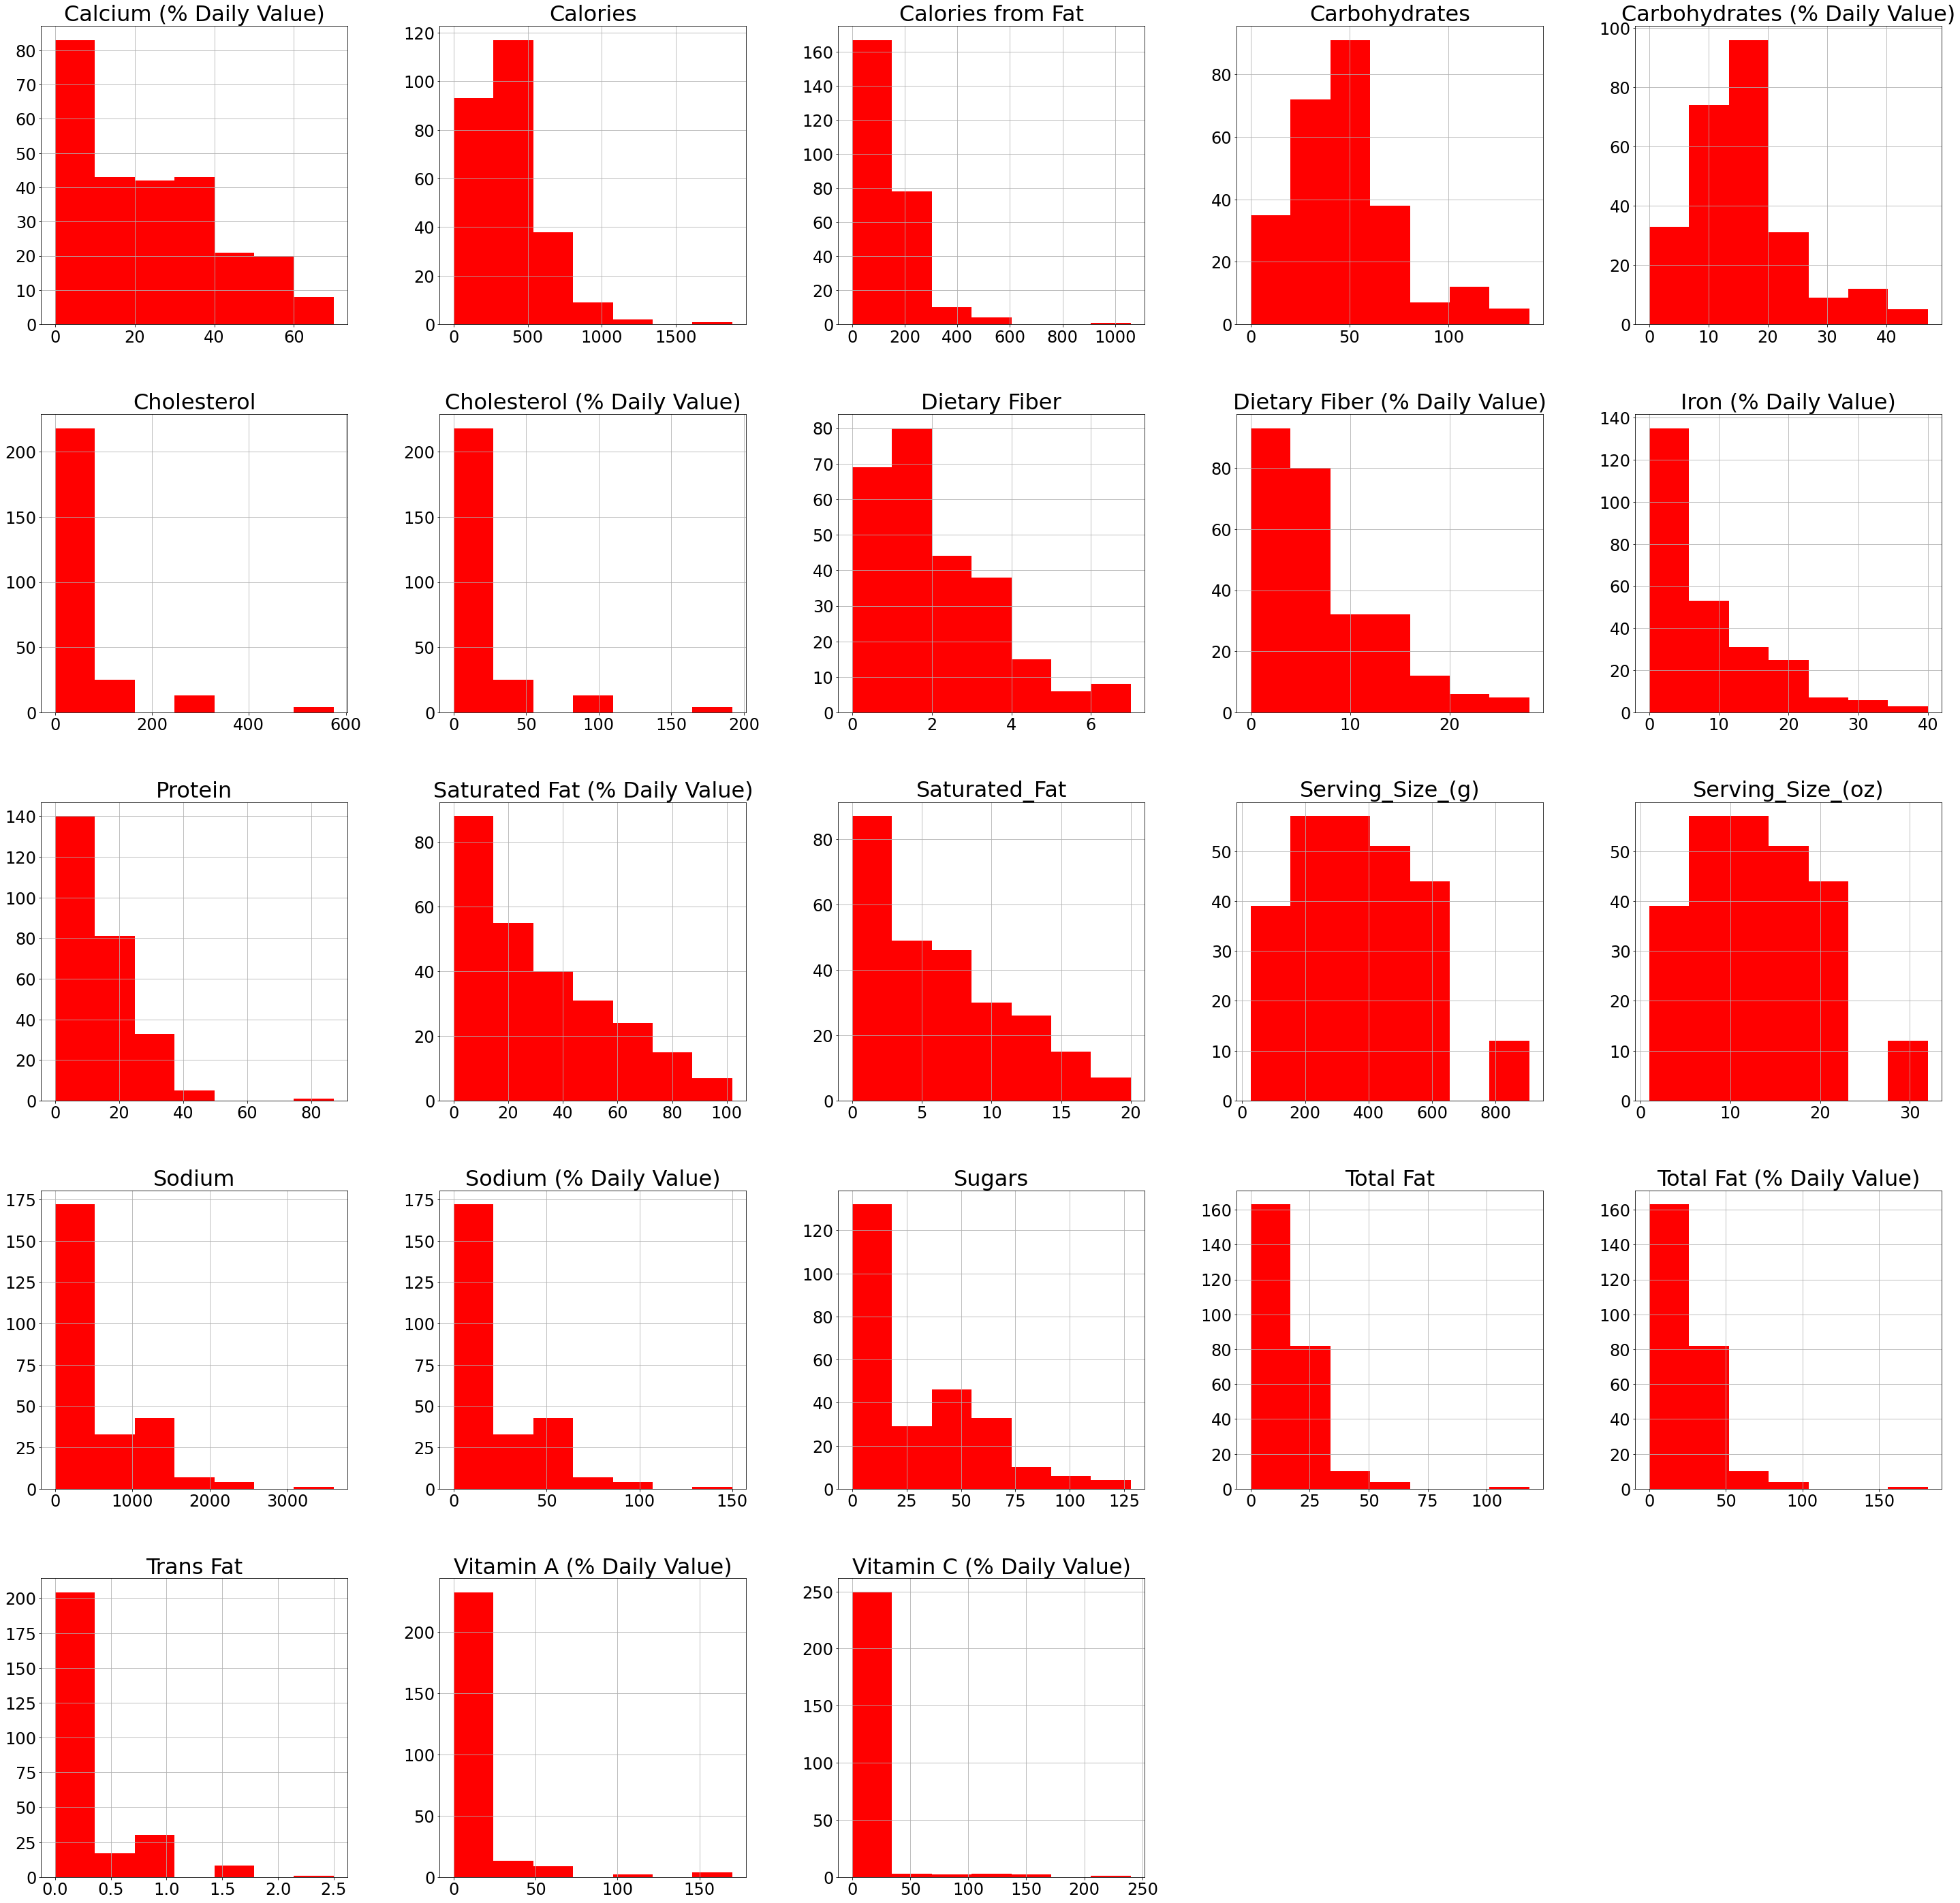

In [17]:
import matplotlib
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)
all_hist = df.hist(bins=7, figsize=(50,50), color = 'red')
plt.show()

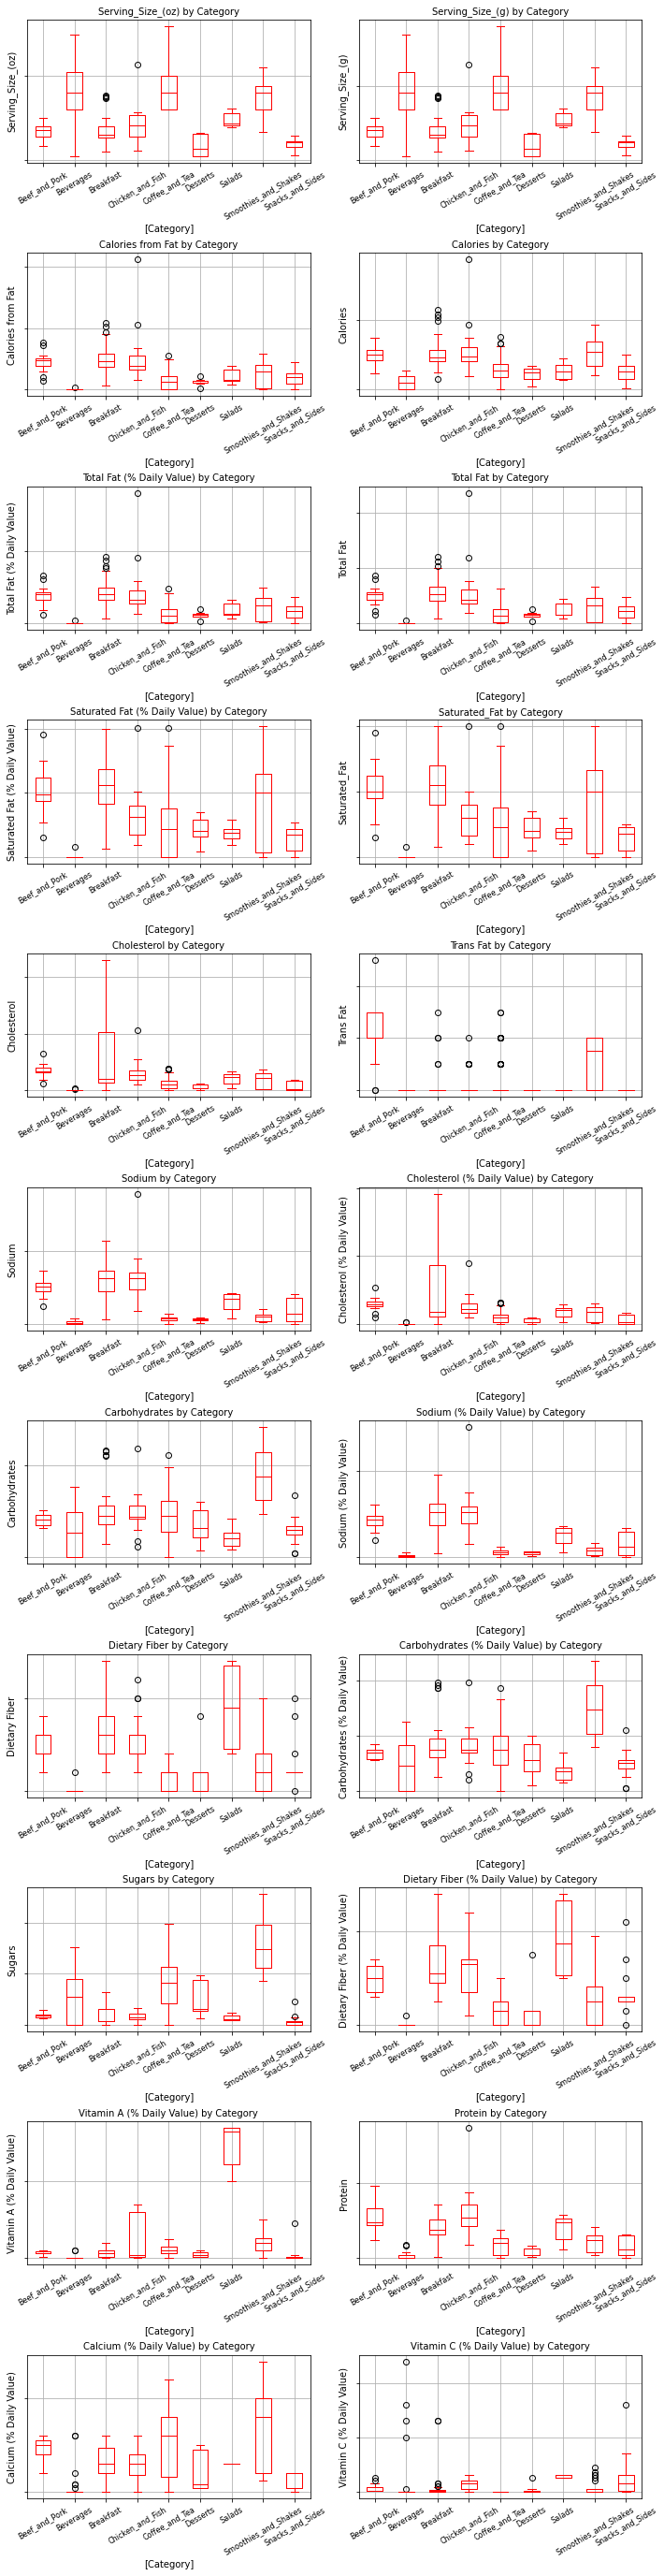

In [18]:

#numpy array with ax[row_idx, col_idx]
fig, ax = plt.subplots(11, 2, figsize=(10,40))

for i,column in enumerate(df.columns[3:]):
     if i <= 1: #if column index is less than 3, put these graphs in row 0 col i
        #sns.boxplot(x=df[column],ax=ax[0,i])
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[0,i])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        ##plt_x.set_xlabel("Category", fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=2 and i<=3:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[1,i-3])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=4 and i<=5:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[2,i-5])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8) 
     elif i>=6 and i<=7:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[3,i-7])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8) 
     elif i>=8 and i<=9:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[4,i-9])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8) 
     elif i>=10 and i<=11:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[5,i-11])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=12 and i<=13:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[6,i-13])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=14 and i<=15:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[7,i-15])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=16 and i<=17:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[8,i-17])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=18 and i<=19:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[9,i-19])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)
     elif i>=20 and i<=21:
        plt_x = df.boxplot(column= column, by=['Category'], color = 'red',ax=ax[10,i-21])
        plt_x.set_title(column + " by Category", fontsize=10)
        plt_x.get_figure().suptitle('')
        plt_x.set_ylabel(column, fontsize=10)
        plt_x.get_figure().gca().set_xlabel("")
        plt_x.set_xticklabels(plt_x.get_xticklabels(),rotation=30, fontsize=8)
        plt_x.set_yticklabels(plt_x.get_yticklabels(),rotation=0, fontsize=8)


  #for t in plt.texts:
    #t.set_visible(False)

#fig.suptitle('Categories', fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.show()
plt.clf()
plt.close()

In [19]:
df.groupby('Category')['Calories'].describe()


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Beef_and_Pork,15.0,494.000000,141.360734,240.0,430.0,500.0,570.0,750.0
Beverages,27.0,113.703704,99.194764,0.0,0.0,100.0,190.0,280.0
Breakfast,42.0,526.666667,221.675072,150.0,410.0,470.0,570.0,1150.0
Chicken_and_Fish,27.0,552.962963,306.541688,190.0,410.0,480.0,610.0,1880.0
Coffee_and_Tea,95.0,283.894737,157.812808,0.0,180.0,270.0,370.0,760.0
Desserts,7.0,222.142857,108.083962,45.0,155.0,250.0,305.0,340.0
Salads,6.0,270.000000,127.436259,140.0,160.0,255.0,357.5,450.0
Smoothies_and_Shakes,28.0,531.428571,230.871365,210.0,337.5,540.0,692.5,930.0
Snacks_and_Sides,13.0,245.769231,141.772208,15.0,150.0,260.0,340.0,510.0


Using the categories is a good strategy in this case as a starting point. Asking about:

1- Category <br/>
2- Clories <br/>
3- Saturated Fats <br/>

These are logical and pertinent questions for anyone buying a fast food meal. 

**TRIAL 2 : CONTENT-BASED FILTERING (CATEGORY + CALORIES)**

In [20]:
from sklearn.neighbors import NearestNeighbors                                  # knn clustering
from scipy.sparse import csr_matrix                                             # csr_matrix
from sklearn.decomposition import TruncatedSVD                                  # dimension reduction

In [21]:
col = ['Item','Category','Calories', 'Calories from Fat', 'Serving_Size_(oz)', 'Serving_Size_(g)',
       'Total Fat', 'Total Fat (% Daily Value)',
       'Saturated_Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
       'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
       'Sodium (% Daily Value)', 'Carbohydrates',
       'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)']

df1 = df[col]
df1 = df1.dropna(axis=0)
#df1 = df1.drop_duplicates() 

df_pivot = df1.pivot(index='Item', 
                     columns = 'Category', 
                     values = ['Calories', 'Calories from Fat','Serving_Size_(oz)', 
                               'Serving_Size_(g)','Total Fat', 'Total Fat (% Daily Value)',
                               'Saturated_Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat',
                               'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium',
                               'Sodium (% Daily Value)', 'Carbohydrates','Carbohydrates (% Daily Value)', 
                               'Dietary Fiber','Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
                               'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
                               'Calcium (% Daily Value)', 'Iron (% Daily Value)']).fillna(0)
df_pivot_matrix = csr_matrix(df_pivot)

df_pivot_matrix

df_pivot.head(2)

Calories  ... Iron (% Daily Value)
Category            Beef_and_Pork  ...     Snacks_and_Sides
Item                               ...                     
1% Low Fat Milk Jug           0.0  ...                  0.0
Apple Slices                  0.0  ...                  0.0

[2 rows x 207 columns]

In [22]:
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(df_pivot_matrix)

In [23]:
print("Welcome to the McDonald's Recommender!!!\nFor each of the following questions, make a choice and type in the corresponding number!")
print(" ")

print ("1.Breakfast\n2.Chicken & Fish\n3.Beef & Pork\n4.Snacks & Sides\n5.Salads\n6.Beverages\n7.Coffee & Tea\n8.Smoothies &Shakes\n9.Desserts")
cat1 = input("Which Category would you like? ")#enter calories 
if cat1=="1":
  cat1 ='Breakfast'
elif cat1=="2":
  cat1 ='Chicken_and_Fish' 
elif cat1=="3":
  cat1 = 'Beef_and_Pork' 
elif cat1=="4":
  cat1 = 'Snacks_and_Sides'
elif cat1 =="5":
  cat1 = 'Salads'
elif cat1 =="6":
  cat1 = 'Beverages'
elif cat1 =="7":
  cat1 = 'Coffee_and_Tea'
elif cat1 =="8":
  cat1 = 'Smoothies_and_Shakes'
elif cat1 =="9":
  cat1 = 'Desserts'
print (" ")

print ("1.50\n2.100\n3.250\n4.500\n5.1000\n6.1500\n7.2000")
calorie= input('How many calories would you like in the meal? ') #enter number of calories 
if calorie=="1":
  calorie = 50.0
elif calorie=="2":
  calorie = 100.0
elif calorie=="3":
  calorie = 250.0 
elif calorie=="4":
  calorie = 500.0
elif calorie =="5":
  calorie = 1000.0
elif calorie =="6":
  calorie = 1500.0
elif calorie =="7":
  calorie = 2000.0
print(" ")

print ("1.One\n2.Two\n3.Three\n4.Four\n5.Five")
n_recomm = (int(input('How many recommendations would you like? ')))  # you can enter the number of recommendations you want 
print(" ")


if cat1=='Breakfast':
  all_cal = list(df_pivot.Calories.Breakfast)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)
  #test = df.loc[df.index == indx_c, 'Item'].iloc[0]

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Salads":
  all_cal = list(df_pivot.Calories.Salads)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n') 

elif cat1=="Beef_and_Pork":
  all_cal = list(df_pivot.Calories.Beef_and_Pork)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Chicken_and_Fish":
  all_cal = list(df_pivot.Calories.Chicken_and_Fish)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Beverages":
  all_cal = list(df_pivot.Calories.Beverages)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Coffee_and_Tea":
  all_cal = list(df_pivot.Calories.Coffee_and_Tea)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Smoothies_and_Shakes":
  all_cal = list(df_pivot.Calories.Smoothies_and_Shakes)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Desserts":
  all_cal = list(df_pivot.Calories.Desserts)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

elif cat1=="Snacks_and_Sides":
  all_cal = list(df_pivot.Calories.Snacks_and_Sides)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  indx_c = all_cal.index(closest)

  print(" ")
  print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
  print(" ")
  print("I found {} recommendations for you!".format(n_recomm))
  print(" ")

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_c].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_c]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories (distance {2}).'.format(first_match, cal_first_match, distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories, (distance: {3})'.format(i,item_in_loop,cal_item_in_loop,distance_item_in_loop))
           
  print('\n')

else:
  print("Sorry, not a valid entry! Try again")

Welcome to the McDonald's Recommender!!!
For each of the following questions, make a choice and type in the corresponding number!
 
1.Breakfast
2.Chicken & Fish
3.Beef & Pork
4.Snacks & Sides
5.Salads
6.Beverages
7.Coffee & Tea
8.Smoothies &Shakes
9.Desserts
Which Category would you like? 2
 
1.50
2.100
3.250
4.500
5.1000
6.1500
7.2000
How many calories would you like in the meal? 3
 
1.One
2.Two
3.Three
4.Four
5.Five
How many recommendations would you like? 5
 
 
You want an item from the Chicken_and_Fish menu, which contains around 250.0 Calories.
 
I found 5 recommendations for you!
 
The best match is Chicken McNuggets (6 piece), which contains 280 calories (distance 0.0).
 
You might also enjoy:
 
1 -  Chicken McNuggets (40 piece), which has 1880 Calories, (distance: 7.984922875015066e-06)
2 -  Chicken McNuggets (20 piece), which has 940 Calories, (distance: 9.23763467230998e-06)
3 -  Chicken McNuggets (10 piece), which has 470 Calories, (distance: 1.0490208176117122e-05)
4 -  Chi

**TRIAL 3: CONTENT-BASED FILTERING (CATEGORY + CALORIES + SATURATED FATS)**

In [24]:
print("Welcome to the McDonald's Recommender!!!\nFor each of the following questions, make a choice and type in the corresponding number!")
print(" ")

print ("1.Breakfast\n2.Chicken & Fish\n3.Beef & Pork\n4.Snacks & Sides\n5.Salads\n6.Beverages\n7.Coffee & Tea\n8.Smoothies &Shakes\n9.Desserts")
cat1 = input("Which Category would you like? ")#enter calories 
if cat1=="1":
  cat1 ='Breakfast'
elif cat1=="2":
  cat1 ='Chicken_and_Fish' 
elif cat1=="3":
  cat1 = 'Beef_and_Pork' 
elif cat1=="4":
  cat1 = 'Snacks_and_Sides'
elif cat1 =="5":
  cat1 = 'Salads'
elif cat1 =="6":
  cat1 = 'Beverages'
elif cat1 =="7":
  cat1 = 'Coffee_and_Tea'
elif cat1 =="8":
  cat1 = 'Smoothies_and_Shakes'
elif cat1 =="9":
  cat1 = 'Desserts'
print (" ")

if cat1 == 'Beverages' or cat1=='Desserts':
  print ("1.100\n2.200\n3.300")

  calorie= input('How many calories would you like in the meal? ') #enter number of calories 
  
  if calorie=="1":
    calorie = 100.0
  elif calorie=="2":
    calorie = 200.0
  elif calorie=="3":
    calorie = 300.0

elif cat1 == 'Snacks_and_Sides' or cat1=='Salads':
  print ("1.100\n2.250\n3.500")

  calorie= input('How many calories would you like in the meal? ') #enter number of calories 
  
  if calorie=="1":
    calorie = 100.0
  elif calorie=="2":
    calorie = 250.0
  elif calorie=="3":
    calorie = 500.0

elif cat1== 'Coffee_and_Tea' or cat1=='Smoothies_and_Shakes':
  print ("1.300\n2.500\n3.1000")

  calorie= input('How many calories would you like in the meal? ') #enter number of calories 
  
  if calorie=="1":
    calorie = 300.0
  elif calorie=="2":
    calorie = 500.0
  elif calorie=="3":
    calorie = 1000.0

elif cat1== 'Beef_and_Pork' or cat1=='Chicken_and_Fish' or cat1=='Breakfast':
  print ("1.500\n2.1000\n3.2000")

  calorie= input('How many calories would you like in the meal? ') #enter number of calories 
  
  if calorie=="1":
    calorie = 500.0
  elif calorie=="2":
    calorie = 1000.0
  elif calorie=="3":
    calorie = 2000.0

print(calorie)
print(" ")

print ("1.One\n2.Two\n3.Three\n4.Four\n5.Five")
n_recomm = (int(input('How many recommendations would you like? ')))  # you can enter the number of recommendations you want 
print(" ")

print("You want an item from the {0} menu, which contains around {1} Calories.".format(cat1,calorie))
print(" ")
print("I found {} recommendations for you!".format(n_recomm))
print(" ")

###################################################################################################################################

if cat1=='Breakfast':
  all_cal = list(df_pivot.Calories.Breakfast)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Breakfast') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Breakfast') & (df['Calories'] == closest), 'Saturated_Fat']
  #print("sat all is:",sat_all)
  #print(sat_table)

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Breakfast') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)

  #print(sat_list)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]
 # print("sat is:",sat)

  #sat dat breakfast from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Breakfast)
  #print(all_sat)

  indx_sat = all_sat.index(sat)
  #print(indx_sat)
  #match = df_pivot.index[indx_sat] 
  #print(match)
  #fat_item = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

###################################################################################################################################
###################################################################################################################################

if cat1=='Chicken_and_Fish':
  all_cal = list(df_pivot.Calories.Chicken_and_Fish)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Chicken_and_Fish') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Chicken_and_Fish') & (df['Calories'] == closest), 'Saturated_Fat']

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Chicken_and_Fish') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]

  #sat dat Chicken_and_Fish from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Chicken_and_Fish)

  indx_sat = all_sat.index(sat)

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

###################################################################################################################################
###################################################################################################################################

if cat1=='Beef_and_Pork':
  all_cal = list(df_pivot.Calories.Beef_and_Pork)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Beef_and_Pork') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Beef_and_Pork') & (df['Calories'] == closest), 'Saturated_Fat']

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Beef_and_Pork') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]

  #sat dat Chicken_and_Fish from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Beef_and_Pork)

  indx_sat = all_sat.index(sat)

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

###################################################################################################################################
###################################################################################################################################

if cat1=='Snacks_and_Sides':
  all_cal = list(df_pivot.Calories.Snacks_and_Sides)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Snacks_and_Sides') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Snacks_and_Sides') & (df['Calories'] == closest), 'Saturated_Fat']

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Snacks_and_Sides') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]

  #sat dat Chicken_and_Fish from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Snacks_and_Sides)

  indx_sat = all_sat.index(sat)

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

###################################################################################################################################
###################################################################################################################################

if cat1=='Salads':
  all_cal = list(df_pivot.Calories.Salads)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Salads') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Salads') & (df['Calories'] == closest), 'Saturated_Fat']

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Salads') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]

  #sat dat Chicken_and_Fish from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Salads)

  indx_sat = all_sat.index(sat)

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

###################################################################################################################################
###################################################################################################################################

if cat1=='Beverages':
  all_cal = list(df_pivot.Calories.Beverages)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Beverages') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Beverages') & (df['Calories'] == closest), 'Saturated_Fat']

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Beverages') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]

  #sat dat Chicken_and_Fish from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Beverages)

  indx_sat = all_sat.index(sat)

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

###################################################################################################################################
###################################################################################################################################

if cat1=='Coffee_and_Tea':
  all_cal = list(df_pivot.Calories.Coffee_and_Tea)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Coffee_and_Tea') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Coffee_and_Tea') & (df['Calories'] == closest), 'Saturated_Fat']

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Coffee_and_Tea') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]

  #sat dat Chicken_and_Fish from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Coffee_and_Tea)

  indx_sat = all_sat.index(sat)

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

###################################################################################################################################
###################################################################################################################################

if cat1=='Smoothies_and_Shakes':
  all_cal = list(df_pivot.Calories.Smoothies_and_Shakes)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Smoothies_and_Shakes') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Smoothies_and_Shakes') & (df['Calories'] == closest), 'Saturated_Fat']

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Smoothies_and_Shakes') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]

  #sat dat Chicken_and_Fish from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Smoothies_and_Shakes)

  indx_sat = all_sat.index(sat)

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

##############################################################################################################################
###################################################################################################################################

if cat1=='Desserts':
  all_cal = list(df_pivot.Calories.Desserts)
  closest = min(all_cal, key=lambda x:abs(x-calorie))
  
 #filter the items that have closest number of calories in Saturated Fat in Breakfast items 
  sat_all = len(df.loc[(df['Category'] == 'Desserts') & (df['Calories'] == closest), 'Saturated_Fat'])
  sat_table = df.loc[(df['Category'] == 'Desserts') & (df['Calories'] == closest), 'Saturated_Fat']

  sat_list = []
  for i in range (0, sat_all):
    sat_val = df.loc[(df['Category'] == 'Desserts') & (df['Calories'] == closest), 'Saturated_Fat'].iloc[i]
    print('{0} - {1}'.format(i+1, sat_val))
    sat_list.append(sat_val)
  
  sat_entry = int(input(print("How many ounces of Saturated Fat should your meal include? ")))
  sat = sat_list[sat_entry-1]

  #sat dat Chicken_and_Fish from df_pivot is made into a list
  all_sat = list(df_pivot.Saturated_Fat.Desserts)

  indx_sat = all_sat.index(sat)

  distance, indice = model_knn.kneighbors(df_pivot.iloc[indx_sat].values.reshape(1,-1), n_neighbors= n_recomm)

  for i in range(0, len(distance.flatten())):
    if  i == 0:
      first_match = df_pivot.index[indx_sat]
      cal_first_match = df.loc[df['Item'] == first_match, 'Calories'].iloc[0]
      fat_item = df.loc[df['Item'] == first_match, 'Saturated_Fat'].iloc[0]
      distance_first_match = distance.flatten()[i]
      print('The best match is {0}, which contains {1} calories and {2} ounces of Saturated Fat, (distance {3}).'.format(first_match, cal_first_match, fat_item,distance_first_match))
      print(" ")
      print('You might also enjoy:')
      print(" ")
      
    else:
      item_in_loop = df_pivot.index[indice.flatten()[i]]
      cal_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Calories'].iloc[0]
      fat_item_in_loop = df.loc[df['Item'] == item_in_loop, 'Saturated_Fat'].iloc[0]
      distance_item_in_loop = distance.flatten()[i]
      print('{0} -  {1}, which has {2} Calories and {3} ounces of Saturated Fat, (distance: {4}).'.format(i,item_in_loop,cal_item_in_loop, fat_item_in_loop ,distance_item_in_loop))
           
  print('\n')

##############################################################################################################################

Welcome to the McDonald's Recommender!!!
For each of the following questions, make a choice and type in the corresponding number!
 
1.Breakfast
2.Chicken & Fish
3.Beef & Pork
4.Snacks & Sides
5.Salads
6.Beverages
7.Coffee & Tea
8.Smoothies &Shakes
9.Desserts
Which Category would you like? 1
 
1.500
2.1000
3.2000
How many calories would you like in the meal? 2
1000.0
 
1.One
2.Two
3.Three
4.Four
5.Five
How many recommendations would you like? 5
 
You want an item from the Breakfast menu, which contains around 1000.0 Calories.
 
I found 5 recommendations for you!
 
1 - 16.0
How many ounces of Saturated Fat should your meal include? 
1
The best match is Big Breakfast with Hotcakes and Egg Whites (Large Biscuit), which contains 1050 calories and 16.0 ounces of Saturated Fat, (distance 1.1102230246251565e-16).
 
You might also enjoy:
 
1 -  Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit), which has 990 Calories and 16.0 ounces of Saturated Fat, (distance: 3.451142034749388e-05)